<a href="https://colab.research.google.com/github/TrongHvDev/AI/blob/main/week12_preTrained/ResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1/1 [==============================] - 1s 1s/step
Predicted: [('n02108915', 'French_bulldog', 0.2063431), ('n03724870', 'mask', 0.10729581), ('n01704323', 'triceratops', 0.08070235)]


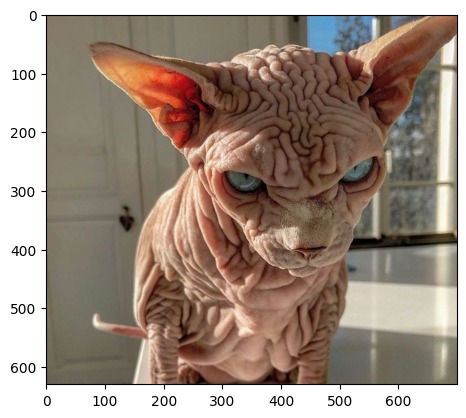

In [ ]:
# ResNet
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt
model = ResNet50(weights='imagenet')

img_path = 'meo1.jpg'
plt.imshow(plt.imread(img_path))
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])
# Predicted: [(u'n02504013', u'Indian_elephant', 0.82658225), (u'n01871265', u'tusker', 0.1122357), (u'n02504458', u'African_elephant', 0.061040461)]

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision.models import vgg16
import torchvision.transforms as T
from torchvision.datasets import CocoDetection
from torch.utils.data import DataLoader
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

# Define the Faster R-CNN model
class FasterRCNN(nn.Module):
    def __init__(self, num_classes):
        super(FasterRCNN, self).__init__()
        self.model = vgg16(pretrained=True)
        self.model = list(self.model.features)[:-1]
        self.model = nn.Sequential(*self.model)
        self.roi_pool = nn.AdaptiveMaxPool2d(7)
        self.fc = nn.Linear(512 * 7 * 7, 4096)
        self.cls_score = nn.Linear(4096, num_classes)
        self.bbox_pred = nn.Linear(4096, num_classes * 4)

    def forward(self, x, boxes):
        x = self.model(x)
        x = self.roi_pool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        x = torch.relu(x)
        cls_score = self.cls_score(x)
        bbox_pred = self.bbox_pred(x)

        return cls_score, bbox_pred

# Create a Faster R-CNN model instance
num_classes = 91  # Number of classes in COCO dataset
model = FasterRCNN(num_classes)

# Load COCO dataset
transform = T.Compose([T.ToTensor()])
train_dataset = CocoDetection(root='/path/to/coco/train2017', annFile='/path/to/coco/annotations/instances_train2017.json', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Training loop
for epoch in range(10):  # Number of epochs
    for i, (images, targets) in enumerate(train_loader):
        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        cls_scores, bbox_preds = model(images, targets)

        # Compute the loss
        loss = criterion(cls_scores, targets['labels'])
        loss += criterion(bbox_preds, targets['boxes'])
        
        # Backward pass
        loss.backward()

        # Update weights
        optimizer.step()

        # Print loss for monitoring
        print(f'Epoch [{epoch + 1}/{10}], Iteration [{i + 1}/{len(train_loader)}], Loss: {loss.item():.4f}')


/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:03<00:00, 156MB/s]


TypeError: ignored